In [10]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [11]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2018-06-01 20:13:02,077 : INFO : loading projection weights from ruscorpora_upos_skipgram_300_5_2018.vec.gz
2018-06-01 20:14:15,194 : INFO : loaded (195071, 300) matrix from ruscorpora_upos_skipgram_300_5_2018.vec.gz


In [12]:
model.init_sims(replace=True)

2018-06-01 20:14:15,273 : INFO : precomputing L2-norms of word weight vectors


In [48]:
words = ['стул_NOUN', 'стол_NOUN', 'табурет_NOUN', 'шкаф_NOUN']

In [49]:
gr = {}
for word in words:
    # есть ли слово в модели? Может быть, и нет
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            if i[0] not in gr:
                gr[i[0]]=i[1]
            else:
                continue
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print(word + ' is not present in the model')
print(gr)

стул_NOUN
[-0.041871   -0.099553   -0.044728   -0.05375401 -0.08870501  0.020671
 -0.026611   -0.04235001 -0.001806    0.06708901]
табурет_NOUN 0.8093909621238708
кресло_NOUN 0.8025002479553223
табуретка_NOUN 0.7934796810150146
диван_NOUN 0.7744786143302917
стул_VERB 0.7281738519668579
кровать_NOUN 0.727545976638794
кушетка_NOUN 0.7187489867210388
табурет_VERB 0.691589891910553
столик_NOUN 0.6898729801177979
стултраница_NOUN 0.6828867197036743


стол_NOUN
[-0.032818   -0.09206399 -0.020422    0.01841    -0.029494    0.01891
 -0.021013    0.016784    0.043146    0.035702  ]
столомтраница_NOUN 0.6771054267883301
стул_NOUN 0.6719151139259338
скатерть_NOUN 0.6601302027702332
столетраница_NOUN 0.6488069295883179
столетраница_VERB 0.6439605951309204
ломберный_ADJ 0.6373645067214966


табурет_NOUN
[ 0.002168   -0.14956701 -0.01074    -0.025551   -0.024117    0.017314
 -0.027638   -0.008515   -0.023545    0.08070001]
табуреточка_NOUN 0.6879167556762695
стол_NOUN 0.6501899361610413


шкаф_NOUN


In [50]:
import networkx as nx

In [51]:
G = nx.Graph()
for word in words:
    G.add_node(word, label = word)
for elem in gr:
    if gr[elem]>0.5:
        G.add_node(elem, label=elem)
        G.add_edge(word, elem)

In [52]:
import matplotlib.pyplot as plt 

In [53]:
pos=nx.spring_layout(G)

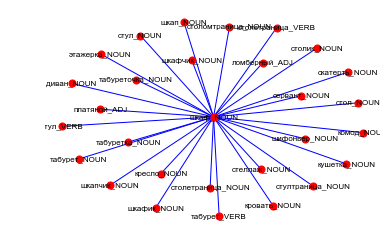

In [54]:
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=8, font_family='Arial')
plt.axis('off') 
plt.show() 

In [55]:
print('Радиус графа: ', nx.radius(G))
print('Коэффициент кластеризации: ', nx.average_clustering(G))

Радиус графа:  1
Коэффициент кластеризации:  0.0


In [57]:
deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print('Самое центральное слово: ',nodeid)
    break

Самое центральное слово:  шкаф_NOUN
